<a href="https://colab.research.google.com/github/mepky/kaggle-comp./blob/master/Malaria_disease_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd cell_images

/content/cell_images


In [0]:
import os
base_dir='cell_images'
os.mkdir(base_dir)

In [4]:
%cd cell_images

/content/cell_images/cell_images


In [0]:
base_dir='Parasitized'
os.mkdir(base_dir)
base='Uninfected'
os.mkdir(base)

In [6]:
!unzip Parasitized.zip -d Parasitized

Archive:  Parasitized.zip
   creating: Parasitized/Parasitized/
  inflating: Parasitized/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
  inflating: Parasitized/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_139.png  
  inflating: Parasitized/Parasitized/C100P61ThinF_IMG_20150918_145422_cell_167.png  
  inflating: Parasitized/Parasitized/C100P61ThinF_IMG_20150918_150041_cell_149.png  
  inflating: Parasitized/Parasitized/C101P62ThinF_IMG_20150918_151006_cell_84.png  
  inflating: Parasitized/Parasitized/C101P62ThinF_IMG_20150918_151149_cell_72.png  
  inflating: Parasitized/Parasitized/C101P62ThinF_IMG_20150918_151335_cell_78.png  
  inflating: Parasitized/Parasitized/C101P62ThinF_IMG_20150918_151507_cell_58.png  
  inflating: Parasitized/Parasitized/C101P62ThinF_IMG_20150918_151507_cell_61.png  
  inflating: Parasitized/Parasitized/C101P62ThinF_IMG_20150918_151507_cell_62.png  
  inflating: Parasitized/Parasitized/C101P62ThinF_IMG_20150918_151507_cell_64.png  
  inflat

In [7]:
!unzip Uninfected.zip -d Uninfected

Archive:  Uninfected.zip
   creating: Uninfected/Uninfected/
  inflating: Uninfected/Uninfected/C100P61ThinF_IMG_20150918_145609_cell_48.png  
  inflating: Uninfected/Uninfected/C100P61ThinF_IMG_20150918_150041_cell_125.png  
  inflating: Uninfected/Uninfected/C100P61ThinF_IMG_20150918_150041_cell_47.png  
  inflating: Uninfected/Uninfected/C101P62ThinF_IMG_20150918_151006_cell_59.png  
  inflating: Uninfected/Uninfected/C101P62ThinF_IMG_20150918_151239_cell_29.png  
  inflating: Uninfected/Uninfected/C101P62ThinF_IMG_20150918_155731_cell_57.png  
  inflating: Uninfected/Uninfected/C101P62ThinF_IMG_20150923_170344_cell_61.png  
  inflating: Uninfected/Uninfected/C102P63ThinF_IMG_20150918_161508_cell_113.png  
  inflating: Uninfected/Uninfected/C102P63ThinF_IMG_20150918_162051_cell_130.png  
  inflating: Uninfected/Uninfected/C102P63ThinF_IMG_20150918_162051_cell_65.png  
  inflating: Uninfected/Uninfected/C102P63ThinF_IMG_20150918_162300_cell_129.png  
  inflating: Uninfected/Uninfecte

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


In [0]:
infected = os.listdir('/content/cell_images/cell_images/Parasitized/Parasitized/') 
uninfected = os.listdir('/content/cell_images/cell_images/Uninfected/Uninfected/')

In [26]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("/content/cell_images/cell_images/Parasitized/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("/content/cell_images/cell_images/Uninfected/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')

In [0]:
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

In [28]:
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (96453, 50, 50, 3) | labels : (96453,)


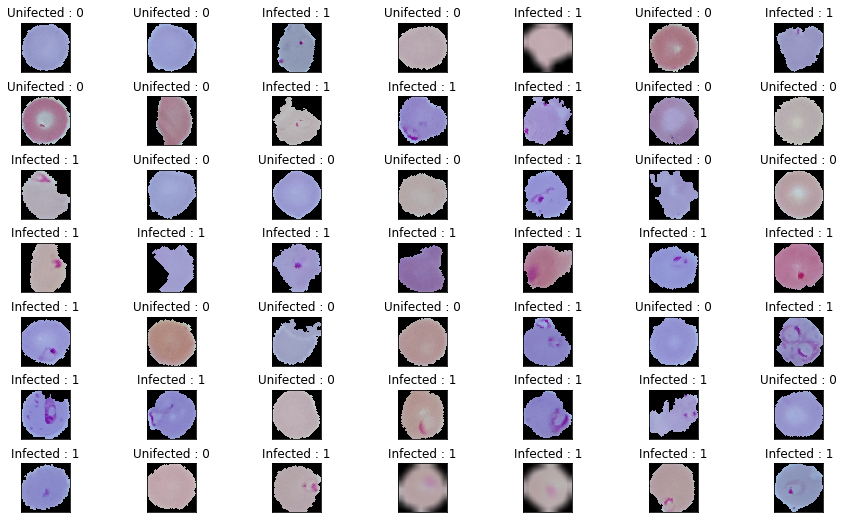

In [29]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

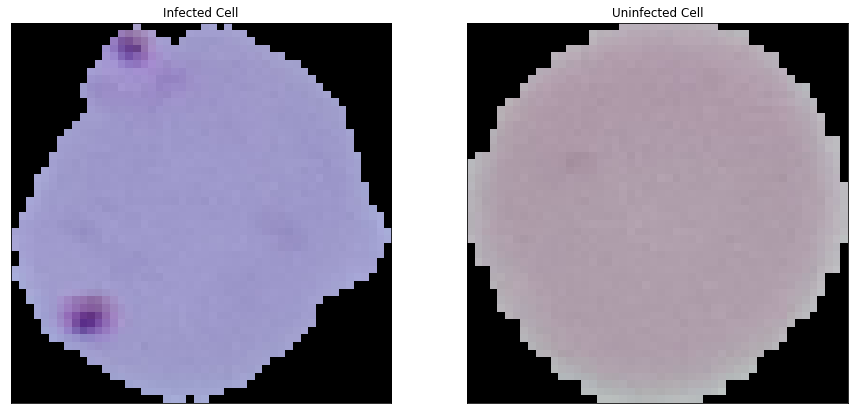

In [30]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cells[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cells[60000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [0]:
n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

In [0]:
cells = cells.astype(np.float32)
labels = labels.astype(np.int32)
cells = cells/255

In [0]:
from sklearn.model_selection import train_test_split

train_x , x , train_y , y = train_test_split(cells , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)


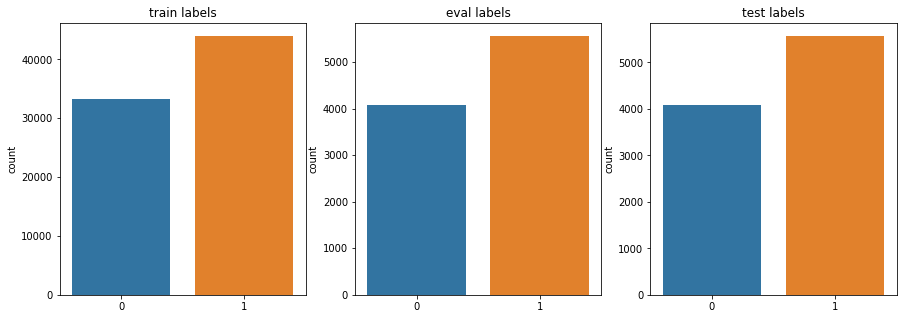

In [34]:
plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([train_y , eval_y , test_y] , ['train labels','eval labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [35]:
print('train data shape {} ,eval data shape {} , test data shape {}'.format(train_x.shape,
                                                                           eval_x.shape ,
                                                                           test_x.shape))

train data shape (77162, 50, 50, 3) ,eval data shape (9645, 50, 50, 3) , test data shape (9646, 50, 50, 3)


In [0]:
tf.reset_default_graph()
def cnn_model_fn(features , labels , mode):
    input_layers = tf.reshape(features['x'] , [-1 , 50 , 50 ,3])    
    conv1 = tf.layers.conv2d(
        inputs = input_layers , 
        filters = 50 , 
        kernel_size = [7 , 7],
        padding = 'same',
        activation = tf.nn.relu
        ) 
    
    
    conv2 = tf.layers.conv2d(
        inputs = conv1, 
        filters = 90,
        kernel_size = [3 , 3],
        padding = 'valid',
        activation = tf.nn.relu
        )

        
    conv3 = tf.layers.conv2d(
        inputs = conv2 ,
        filters = 10,
        kernel_size = [5 , 5],
        padding = 'same', 
        activation = tf.nn.relu
        )
    
    pool1 = tf.layers.max_pooling2d(inputs = conv3 , pool_size = [2 , 2] ,
                                    strides = 2 )
    conv4 = tf.layers.conv2d(
        inputs = pool1 ,
        filters = 5,
        kernel_size = [3 , 3],
        padding = 'same', 
        activation = tf.nn.relu
        )

    pool2 = tf.layers.max_pooling2d(inputs = conv4 , pool_size = [2 , 2] ,
                                    strides = 2 , padding = 'same')
    
    pool2_flatten = tf.layers.flatten(pool2)
    fc1 = tf.layers.dense(
        inputs = pool2_flatten,
        units = 2000,
        activation = tf.nn.relu
        )
    fc2 = tf.layers.dense(
        inputs = fc1,
        units = 1000,
        activation = tf.nn.relu
        )
    fc3 = tf.layers.dense(
        inputs = fc2 , 
        units = 500 ,
        activation = tf.nn.relu
        )
    logits = tf.layers.dense(
        inputs = fc3 ,
        units = 2
        )
    
    predictions = {
        'classes': tf.argmax(input = logits , axis = 1),
        'probabilities': tf.nn.softmax(logits , name = 'softmax_tensor')
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode , 
                                          predictions = predictions)
    
    loss = tf.losses.sparse_softmax_cross_entropy(labels = labels , 
                                                 logits = logits)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
        train_op = optimizer.minimize(loss = loss , 
                                      global_step = tf.train.get_global_step())
        
        return tf.estimator.EstimatorSpec(mode = mode , 
                                            loss = loss , 
                                            train_op = train_op 
                                           )
    eval_metric_op = {'accuracy' : tf.metrics.accuracy(labels = labels ,
                                         predictions =  predictions['classes'])}
    
    return tf.estimator.EstimatorSpec(mode = mode , 
                                      loss = loss , 
                                      eval_metric_ops = eval_metric_op)    

In [37]:
malaria_detector = tf.estimator.Estimator(model_fn = cnn_model_fn , 
                                         model_dir = '/tmp/modelchkpt')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/modelchkpt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f988f78fb00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
tensors_to_log = {'probabilities':'softmax_tensor'}
logging_hook = tf.train.LoggingTensorHook(
    tensors = tensors_to_log , every_n_iter = 50 
    )

In [39]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x': train_x},
    y = train_y,
    batch_size = 100 , 
    num_epochs = None , 
    shuffle = True
    )
malaria_detector.train(input_fn = train_input_fn , steps = 1 , hooks = [logging_hook])

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.Dense instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 

In [40]:
malaria_detector.train(input_fn = train_input_fn , steps = 10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/modelchkpt/model.ckpt-1
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/modelchkpt/model.ckpt.
INFO:tensorflow:loss = 0.69782037, step = 1
INFO:tensorflow:global_step/sec: 10.926
INFO:tensorflow:loss = 0.6910272, step = 101 (9.163 sec)
INFO:tensorflow:global_step/sec: 11.0972
INFO:tensorflow:loss = 0.6892335, step = 201 (9.003 sec)
INFO:tensorflow:global_step/sec: 11.0927
INFO:tensorflow:loss = 0.6807633, step = 301 (9.015 sec)
INFO:tensorflow:global_step/sec: 11.0424
INFO:tensorflow:loss = 0.70137644, step = 401 (9.056 sec)
INFO:tensorflow:global_step/sec: 10.9562
INFO:tensorflow:loss = 0.67921114, step = 501 (9.128 sec)
INFO:tensorfl

In [41]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x': eval_x},
    y = eval_y , 
    num_epochs = 1 , 
    shuffle = False
    )
eval_results = malaria_detector.evaluate(input_fn = eval_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-18T09:41:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/modelchkpt/model.ckpt-10001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-10-18-09:42:00
INFO:tensorflow:Saving dict for global step 10001: accuracy = 0.7788491, global_step = 10001, loss = 0.44983447
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10001: /tmp/modelchkpt/model.ckpt-10001
{'accuracy': 0.7788491, 'loss': 0.44983447, 'global_step': 10001}


In [42]:
pred_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x' : test_x},
    y = test_y,
    num_epochs = 1,
    shuffle = False
    )

y_pred = malaria_detector.predict(input_fn = pred_input_fn)
classes = [p['classes'] for p in y_pred]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/modelchkpt/model.ckpt-10001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [43]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print('{} \n{} \n{}'.format(confusion_matrix(test_y , classes) , 
                           classification_report(test_y , classes) , 
                           accuracy_score(test_y , classes)))

[[2822 1254]
 [ 784 4786]] 
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      4076
           1       0.79      0.86      0.82      5570

    accuracy                           0.79      9646
   macro avg       0.79      0.78      0.78      9646
weighted avg       0.79      0.79      0.79      9646
 
0.7887207132490152


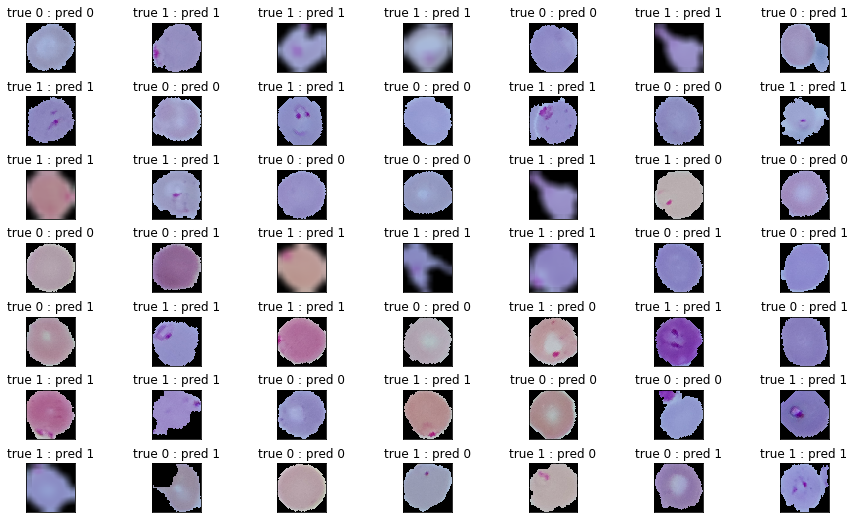

In [44]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint( 0  , test_x.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(test_x[r[0]])
    plt.title('true {} : pred {}'.format(test_y[r[0]] , classes[r[0]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [11]:
!pwd

/content/cell_images/cell_images


In [0]:
/content/cell_images/cell_images/Parasitized/Parasitized

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle

Using TensorFlow backend.


In [0]:
X_para = []
Y_para = []
myfiles = glob.glob("/content/cell_images/cell_images/Parasitized/Parasitized/*.png")
for file in myfiles:
    kernel = np.array([[0,-1,0],[-1,6,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread(file) , (120,120)) , -1 , kernel)
    image_yuv = cv2.cvtColor(img ,cv2.COLOR_BGR2YUV )
    image_yuv[: ,: , 0] = cv2.equalizeHist(image_yuv[:,:,0])
    image = cv2.cvtColor(image_yuv , cv2.COLOR_YUV2RGB)
    X_para.append(image)
    Y_para.append(1)

In [0]:
X_un , Y_un = [],[]
unfiles = glob.glob("/content/cell_images/cell_images/Uninfected/Uninfected/*.png")
for file in unfiles:
    kernel = np.array([[0,-1,0],[-1,7,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread(file) , (120,120)) , -1 , kernel)
    X_un.append(img)
    Y_un.append(0)

In [0]:
X = X_para + X_un
Y = Y_para + Y_un
X,Y = shuffle = (X,Y)
X,Y = shuffle = (X,Y)
X,Y = shuffle = (X,Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3 , random_state =42)
X = np.array(X)

In [15]:
inp = Input(shape = (120 , 120 , 3))
x = Conv2D(filters = 16 , kernel_size = (3,3) , strides = (1,1) , padding = "valid" , kernel_initializer=glorot_uniform(seed = 2))(inp)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 32 , kernel_size = (4,4) , strides = (2,2) , padding = "valid" , kernel_initializer=glorot_uniform(seed = 2))(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = (2,2) , strides = (2,2) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 64 , kernel_size = (3,3) , strides = (2,2) , padding = "valid" , kernel_initializer = glorot_uniform(seed = 2))(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 128 , kernel_size = (3,3) , strides = (1,1) , padding = "valid" , kernel_initializer = glorot_uniform())(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = (2,2) , strides = (2,2) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 256 , kernel_size = (2,2) , strides = (2,2) , padding = "valid" , kernel_initializer = glorot_uniform())(x)
x = Activation("relu")(x)
x = AveragePooling2D(pool_size = (3,3) , strides = (1,1) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(120)(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Dense(60)(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Dense(10)(x)
x = Activation("relu")(x)
x = Dropout(0.)(x)
x = Dense(1)(x)
output = Activation("sigmoid")(x)
model  = Model(inputs =inp , outputs = output )





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [16]:
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
history = model.fit(np.array(X_train) ,np.array(Y_train) , epochs = 13 ,validation_split = 0.2 )



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 15432 samples, validate on 3858 samples
Epoch 1/13





15432/15432 [==============================] - 31s 2ms/step - loss: 8.0644 - acc: 0.4994 - val_loss: 7.9964 - val_acc: 0.5039
Epoch 2/13
15432/15432 [==============================] - 23s 1ms/step - loss: 8.0622 - acc: 0.4998 - val_loss: 7.9964 - val_acc: 0.5039
Epoch 3/13
15432/15432 [==============================] - 23s 1ms/step - loss: 8.0651 - acc: 0.4996 - val_loss: 7.9964 - val_acc: 0.5039
Epoch 4/13
15432/15432 [==============================] - 22s 1ms/step - loss: 8.0601 - acc: 0.4999 - val_loss: 7.9964 - val_acc: 0.5039
Epoch 5/13
15432/15432 [==============================] - 23s 1ms/step - loss: 8.0642 - acc: 0.4997 - val_loss: 7.9964 - val_acc: 0.5039
Epoch 6/13
15432/15432 [==============================] - 22s 1ms/step - loss: 8.0611 - acc: 0.4999 - val_loss: 7.9964 - val_acc: 0.5039
Epoch 7/13
15432/15432 [=

In [17]:
y_pre = model.predict(np.array(X_test))
y_pre = np.reshape(y_pre ,(8268,) )
Y_test = np.array(Y_test)
fil = y_pre > 0.8
y_pre[fil] = 1
fil = y_pre < 0.8
y_pre[fil] = 0
np.sum(Y_test == y_pre)/8268

0.4985486211901306

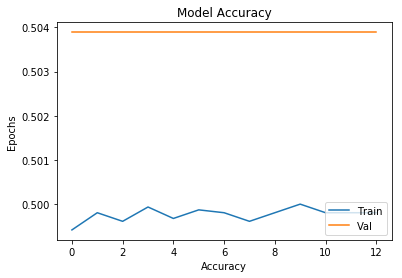

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

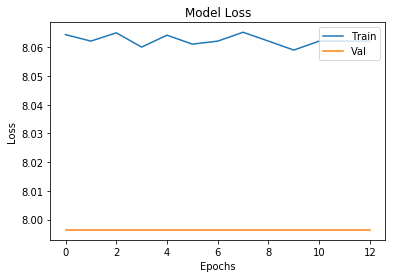

In [19]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()